<a href="https://colab.research.google.com/github/grjadhav409/MCF7-inhibitors-prediction-using-ML/blob/main/5_6_model_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lib

In [ ]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# X and y

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1= pd.concat([pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/MCF7/data/X_rdkit.csv"), pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/MCF7/data/y_class_01.csv")], axis=1)
df = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,class
0,13.182830,-0.476693,13.182830,0.055287,0.201967,549.547,526.363,549.176067,204.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,13.199973,-0.440714,13.199973,0.222894,0.437852,416.416,399.280,416.139702,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,12.591705,-0.712759,12.591705,0.026745,0.240164,482.661,440.325,482.303224,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,14.202941,-1.166637,14.202941,0.131963,0.352801,520.607,492.383,520.166808,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,10.427797,-0.376551,10.427797,0.028222,0.529466,333.516,298.236,333.266779,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32297,11.970142,-0.183834,11.970142,0.183834,0.316266,446.532,424.356,446.141262,162.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32298,12.104517,-0.199427,12.104517,0.199427,0.319567,455.543,434.375,455.141596,164.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32299,12.642889,-0.364167,12.642889,0.018016,0.290333,566.783,516.383,566.371973,226.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32300,14.696218,-1.170241,14.696218,0.122563,0.187356,638.576,615.392,638.178607,236.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df2 =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df2

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,class
0,13.182830,-0.476693,13.182830,0.055287,0.201967,549.547,526.363,549.176067,204.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,13.199973,-0.440714,13.199973,0.222894,0.437852,416.416,399.280,416.139702,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,12.591705,-0.712759,12.591705,0.026745,0.240164,482.661,440.325,482.303224,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,14.202941,-1.166637,14.202941,0.131963,0.352801,520.607,492.383,520.166808,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,10.427797,-0.376551,10.427797,0.028222,0.529466,333.516,298.236,333.266779,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32297,11.970142,-0.183834,11.970142,0.183834,0.316266,446.532,424.356,446.141262,162.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32298,12.104517,-0.199427,12.104517,0.199427,0.319567,455.543,434.375,455.141596,164.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32299,12.642889,-0.364167,12.642889,0.018016,0.290333,566.783,516.383,566.371973,226.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32300,14.696218,-1.170241,14.696218,0.122563,0.187356,638.576,615.392,638.178607,236.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df3 = df2[df2['class']!=2]

df3

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,class
2,12.591705,-0.712759,12.591705,0.026745,0.240164,482.661,440.325,482.303224,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,14.202941,-1.166637,14.202941,0.131963,0.352801,520.607,492.383,520.166808,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,12.816156,-3.944469,12.816156,0.011653,0.425231,490.570,472.426,490.088180,170.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,9.474285,0.434842,9.474285,0.434842,0.499301,338.625,328.545,336.994030,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,12.627718,-0.415289,12.627718,0.415289,0.270480,444.483,420.291,444.157288,168.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32296,14.630344,-3.955424,14.630344,0.091716,0.040961,1117.288,1042.696,1116.523793,430.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
32297,11.970142,-0.183834,11.970142,0.183834,0.316266,446.532,424.356,446.141262,162.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32298,12.104517,-0.199427,12.104517,0.199427,0.319567,455.543,434.375,455.141596,164.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32299,12.642889,-0.364167,12.642889,0.018016,0.290333,566.783,516.383,566.371973,226.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df3.groupby(['class']).count()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
class,,,,,,,,,,,,,,,,,,,,,
0,17175,17175,17175,17175,17175,17175,17175,17175,17175,17175,...,17175,17175,17175,17175,17175,17175,17175,17175,17175,17175
1,6557,6557,6557,6557,6557,6557,6557,6557,6557,6557,...,6557,6557,6557,6557,6557,6557,6557,6557,6557,6557


In [ ]:
X = df3.drop(['class'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
2,12.591705,-0.712759,12.591705,0.026745,0.240164,482.661,440.325,482.303224,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.202941,-1.166637,14.202941,0.131963,0.352801,520.607,492.383,520.166808,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,12.816156,-3.944469,12.816156,0.011653,0.425231,490.570,472.426,490.088180,170.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9.474285,0.434842,9.474285,0.434842,0.499301,338.625,328.545,336.994030,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12.627718,-0.415289,12.627718,0.415289,0.270480,444.483,420.291,444.157288,168.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32296,14.630344,-3.955424,14.630344,0.091716,0.040961,1117.288,1042.696,1116.523793,430.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32297,11.970142,-0.183834,11.970142,0.183834,0.316266,446.532,424.356,446.141262,162.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32298,12.104517,-0.199427,12.104517,0.199427,0.319567,455.543,434.375,455.141596,164.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32299,12.642889,-0.364167,12.642889,0.018016,0.290333,566.783,516.383,566.371973,226.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = df3["class"]
Y

2        0
3        0
5        1
6        1
8        1
        ..
32296    0
32297    0
32298    0
32299    0
32301    1
Name: class, Length: 23732, dtype: int64

# pipeline

In [ ]:
# Split-out validation dataset
#array = dataset.values
#X = array[:,0:60].astype(float)
#Y = array[:,60]
validation_size = 0.20
seed = 7
X_train_1, X_validation, Y_train_1, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

In [ ]:
from imblearn.datasets import make_imbalance
X_train, Y_train = make_imbalance(X_train_1, Y_train_1, sampling_strategy={0: 5000, 1: 5000},random_state=14)


In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))


In [ ]:

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.507300 (0.013130)
LDA: 0.519300 (0.015225)
KNN: 0.500700 (0.018429)
CART: 0.505900 (0.013802)
NB: 0.506000 (0.015139)
SVM: 0.501200 (0.014006)


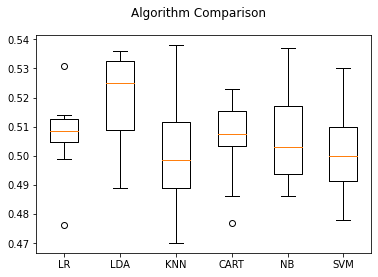

In [ ]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


In [ ]:
 # Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.5, 0.9, 1.5, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.518300 using {'C': 0.9, 'kernel': 'linear'}
0.516000 (0.016721) with: {'C': 0.1, 'kernel': 'linear'}
0.492300 (0.007239) with: {'C': 0.1, 'kernel': 'poly'}
0.509100 (0.015443) with: {'C': 0.1, 'kernel': 'rbf'}
0.511900 (0.013134) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.517300 (0.014220) with: {'C': 0.5, 'kernel': 'linear'}
0.502400 (0.012831) with: {'C': 0.5, 'kernel': 'poly'}
0.507200 (0.011720) with: {'C': 0.5, 'kernel': 'rbf'}
0.510900 (0.015182) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.518300 (0.014178) with: {'C': 0.9, 'kernel': 'linear'}
0.512200 (0.013318) with: {'C': 0.9, 'kernel': 'poly'}
0.507900 (0.013179) with: {'C': 0.9, 'kernel': 'rbf'}
0.509600 (0.014403) with: {'C': 0.9, 'kernel': 'sigmoid'}
0.518000 (0.014866) with: {'C': 1.5, 'kernel': 'linear'}
0.507300 (0.017217) with: {'C': 1.5, 'kernel': 'poly'}
0.511800 (0.012246) with: {'C': 1.5, 'kernel': 'rbf'}
0.510500 (0.013894) with: {'C': 1.5, 'kernel': 'sigmoid'}
0.517600 (0.014881) with: {'C': 2.0, 'kernel': 'line